In [2]:
import keras
from keras.models import load_model
import keras
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import random
from skimage import img_as_ubyte
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Load Model

In [3]:
model = load_model('Relu_model.h5')

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


# Process the Test images

In [3]:
data_stack = []
for i in os.listdir("test_data"):
    if i.endswith(".jpeg"):
        data_stack.append(i)
#print(data_stack)

In [4]:
# saving names and image data in two different Lists : image_names = labels, image_array = training date/input data
gray = False
resizing = True
image_names = []
image_array = []
path = "test_data"
for img in os.listdir(path):
    if img.endswith(".jpeg"):
        #print(img)
        image_names.append(img)
        if gray == True and resizing == True:
            image_array.append(cv2.resize(cv2.cvtColor(cv2.imread(path+"/"+img),cv2.COLOR_RGB2GRAY),(64,64)))
        elif gray == False and resizing == True:
            image_array.append(cv2.resize(cv2.imread(path+"/"+img),(64,64)))
        else:
            image_array.append(cv2.imread(os.path.join(path, img)))
#frame = cv2.imread(os.path.join(image_folder, images[0]))
#row, col, ch = frame.shape
#print(row, col, ch)
print(len(image_names))
print(len(image_array))

2169
2169


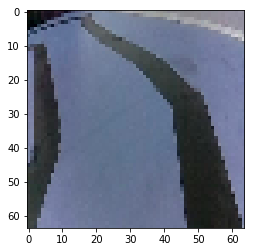

In [8]:
plt.imshow(image_array_np[5],cmap='gray')

In [7]:
image_array_np = np.array(image_array, dtype = "float")/255.
X = image_array_np
print(X[1].shape)

(64, 64, 3)


In [9]:
print(type(X[1]))
print(X[1].shape)

<class 'numpy.ndarray'>
(64, 64, 3)


# Writing to image

In [10]:
img = X[10]
txt_size = 0.33
loc_steer = (240,15)
loc_acc = (220,30)
font = cv2.FONT_HERSHEY_SIMPLEX
acc = model.predict(np.expand_dims(img, axis=0),verbose = 1)
steering = round(acc[0][1],1)
acceleration = round(acc[0][0],1)
#print(steering)
resize_img = cv2.resize(img,(320,160))
cv2.putText(resize_img,"steering: "+str(steering),loc_steer,font,txt_size, (64,224,208))
cv2.putText(resize_img,"acceleration: "+str(acceleration),loc_acc,font,txt_size, (64,224,208))
cv2.imshow('image',resize_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 [==============================] - 1s


In [49]:
from random import randint
for i in range(0,10):
    #print(X[randint(0,len(X))])
    acc = model.predict(np.expand_dims(X[i+1], axis=0),verbose = 1)
    print(acc)
    print("steering: "+str(acc[0][1]))

1/1 [==============================] - 0s
[[0.7555212  0.00467944]]
steering: 0.0046794415
1/1 [==============================] - 0s
[[ 0.43968302 -0.6922235 ]]
steering: -0.6922235
1/1 [==============================] - 0s
[[0.637857   0.40456206]]
steering: 0.40456206
1/1 [==============================] - 0s
[[0.6723504 0.3115024]]
steering: 0.3115024
1/1 [==============================] - 0s
[[ 0.761363  -0.1686266]]
steering: -0.1686266
1/1 [==============================] - 0s
[[0.69116867 0.24181388]]
steering: 0.24181388
1/1 [==============================] - 0s
[[ 0.6714053  -0.39012942]]
steering: -0.39012942
1/1 [==============================] - 0s
[[0.7418375  0.06713076]]
steering: 0.06713076
1/1 [==============================] - 0s
[[ 0.47665796 -0.6194251 ]]
steering: -0.6194251
1/1 [==============================] - 0s
[[ 0.4387548 -0.6769886]]
steering: -0.6769886


# Predict Multiple Images

1/1 [==============================] - 0s
0.6
1/1 [==============================] - 0s
0.7
1/1 [==============================] - 0s
0.5
1/1 [==============================] - 0s
0.5
1/1 [==============================] - 0s
0.5
1/1 [==============================] - 0s
0.8
1/1 [==============================] - 0s
0.6
1/1 [==============================] - 0s
0.7
1/1 [==============================] - 0s
0.5


/home/sebastian/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


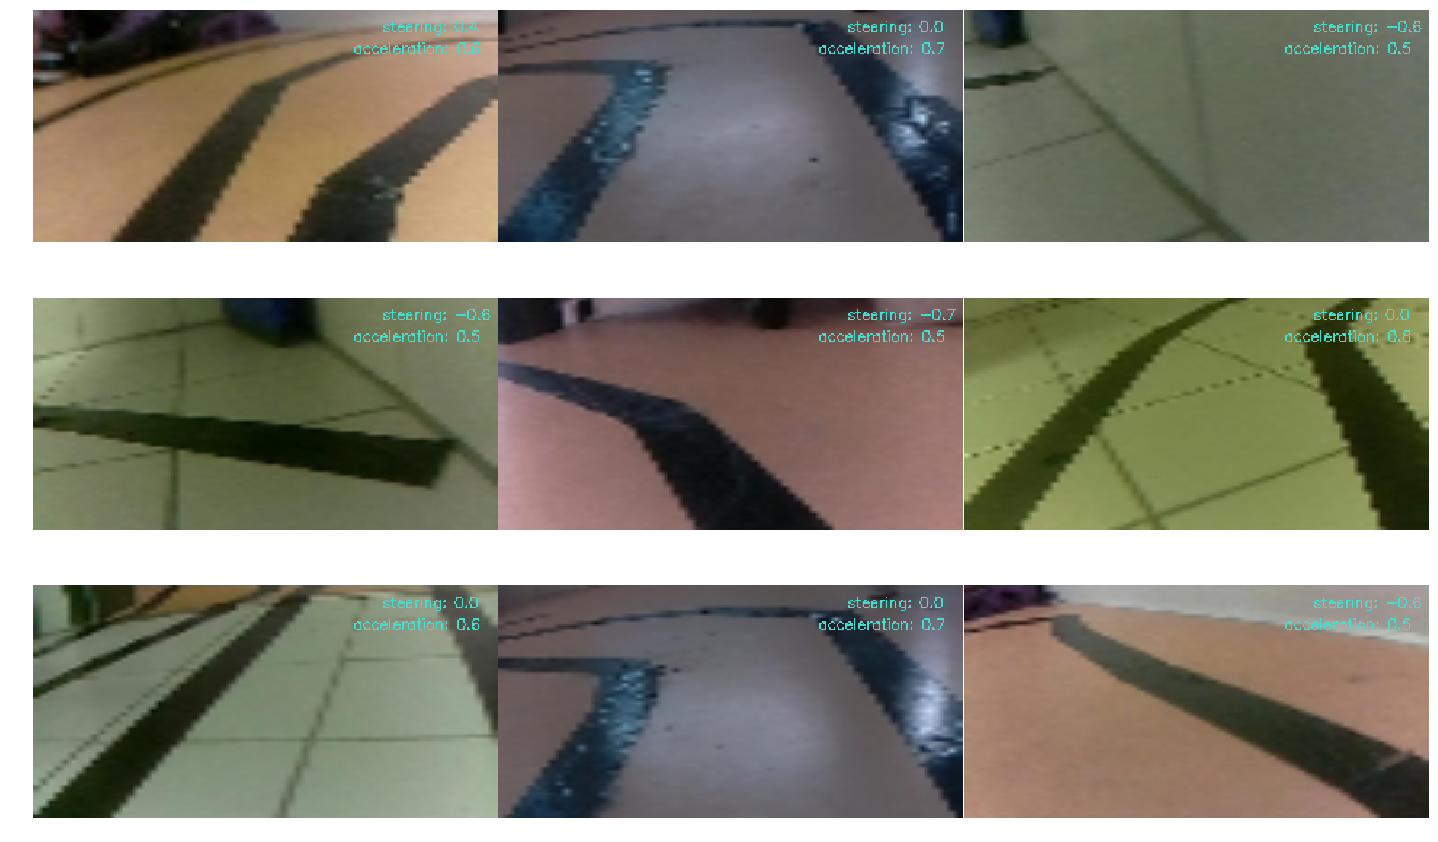

In [33]:

%matplotlib inline

txt_size = 0.33
loc_steer = (240,15)
loc_acc = (220,30)
font = cv2.FONT_HERSHEY_SIMPLEX



fig, axes = plt.subplots(3,3, figsize=(25, 15))
fig.subplots_adjust(hspace = .2, wspace=.001)
axes = axes.ravel()
for i in range(9):
    index = random.randint(0, len(X))
    img = X[index]
    
    pred = model.predict(np.expand_dims(img, axis=0),verbose = 1)
    steering = round(pred[0][1],1)
    acceleration = round(pred[0][0],1)
    resize_img = cv2.resize(img,(320,160))  
    resize_img = cv2.cvtColor(img_as_ubyte(resize_img), cv2.COLOR_BGR2RGB)  #np.uint8
    cv2.putText(resize_img,"steering: "+str(steering),loc_steer,font,txt_size, (64,224,208))
    cv2.putText(resize_img,"acceleration: "+str(acceleration),loc_acc,font,txt_size, (64,224,208))
    print(acceleration)
    axes[i].axis('off')
    axes[i].imshow(resize_img)


# Predicting Steering and Acc + Arrow

1/1 [==============================] - 0s


/home/sebastian/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


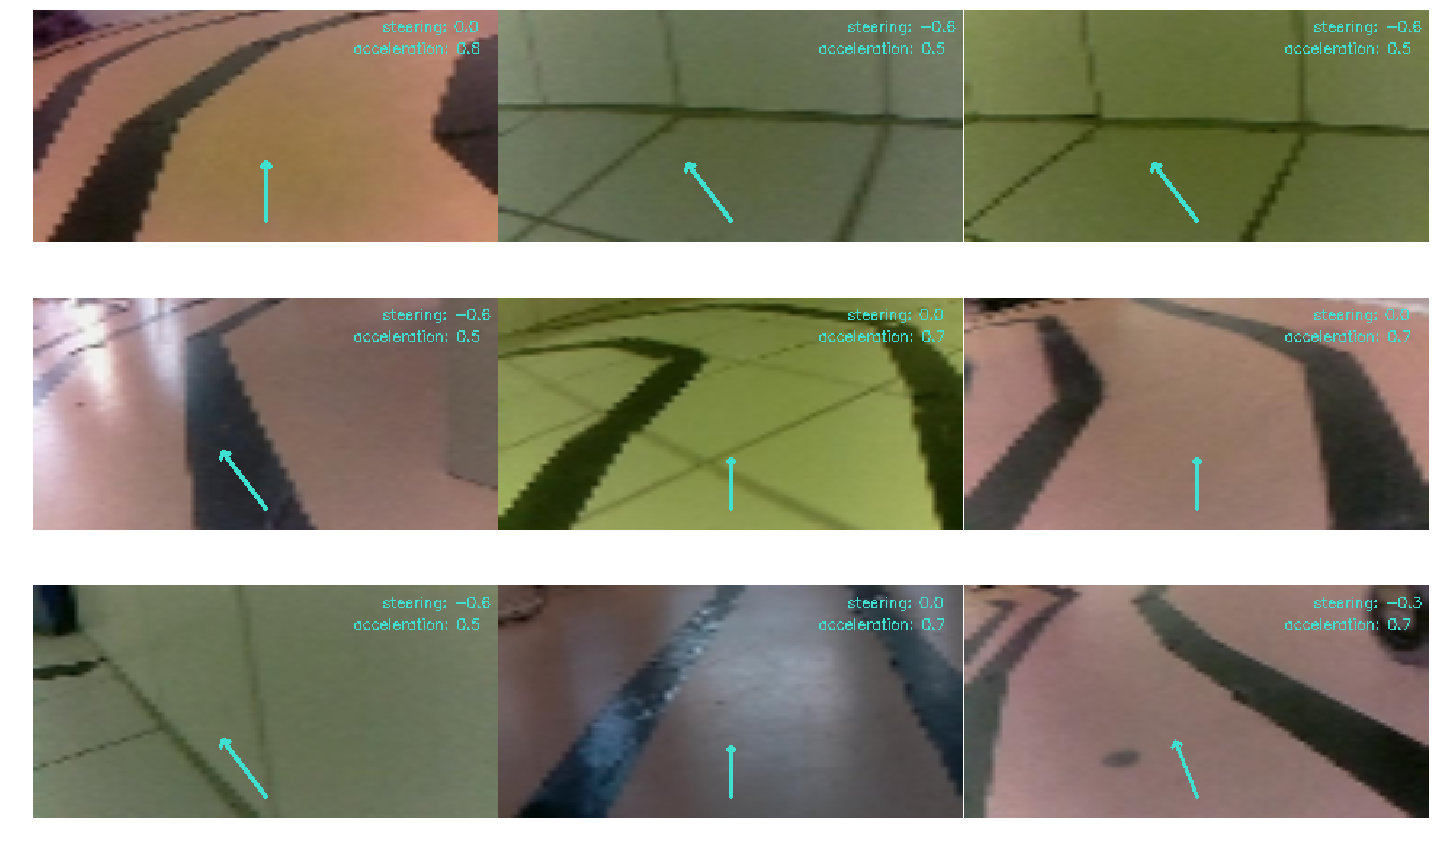

In [63]:
import math
%matplotlib inline

txt_size = 0.33
loc_steer = (240,15)
loc_acc = (220,30)
font = cv2.FONT_HERSHEY_SIMPLEX



fig, axes = plt.subplots(3,3, figsize=(25, 15))
fig.subplots_adjust(hspace = .2, wspace=.001)
axes = axes.ravel()
for i in range(9):
    index = random.randint(0, len(X))
    img = X[index]
    
    pred = model.predict(np.expand_dims(img, axis=0),verbose = 1)
    steering = round(pred[0][1],1)
    acceleration = round(pred[0][0],1)
    resize_img = cv2.resize(img,(320,160))  
    resize_img = cv2.cvtColor(img_as_ubyte(resize_img), cv2.COLOR_BGR2RGB)  #np.uint8
    cv2.putText(resize_img,"steering: "+str(steering),loc_steer,font,txt_size, (64,224,208))
    cv2.putText(resize_img,"acceleration: "+str(acceleration),loc_acc,font,txt_size, (64,224,208))
    #Draw Arrows
    hight = math.sqrt(steering**2+acceleration**2)
    adder = 50
    x_adder = int(steering * adder)
    y_adder = int(hight *adder)
    cv2.arrowedLine(resize_img,(160,145),(160+x_adder,145-y_adder),(64,224,208),2)
    
    
    #print(acceleration)
    axes[i].axis('off')
    axes[i].imshow(resize_img)


# Labeling and saving the Test_imges to write a Video afterwards

In [19]:
# Rename Images according to their order:
image_folder = 'Test_img_labeled/Data_v6_reverse/'
new_folder = "Test_img_labeled"


images = [img for img in os.listdir(image_folder) if img.endswith(".jpeg")]
#images = images["*.jpeg"].sort(key = int)
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

#Sort images by numbers 
images_index = []
for i in images:
    name = i.split(",")[1]
    #print(name)
    os.rename(image_folder+i, new_folder+"/"+name+".jpeg")
    images_index.append(name)
images_index.sort(key = int)

In [35]:
import math
txt_size = 0.33
loc_steer = (240,15)
loc_acc = (220,30)
font = cv2.FONT_HERSHEY_SIMPLEX

from PIL import Image
new_folder = "Test_img_labeled"

images = [img for img in os.listdir(new_folder) if img.endswith(".jpeg")]


for i in images:
    img = cv2.resize(cv2.imread(os.path.join(new_folder, i)),(64,64))
    print(i)
    img = np.array(img, dtype = "float")/255.
    pred = model.predict(np.expand_dims(img, axis=0),verbose = 1)
    steering = round(pred[0][1],1)
    acceleration = round(pred[0][0],1)
    resize_img = cv2.resize(img,(320,160))  
    resize_img = cv2.cvtColor(img_as_ubyte(resize_img), cv2.COLOR_BGR2RGB)  #np.uint8
    cv2.putText(resize_img,"steering: "+str(steering),loc_steer,font,txt_size, (64,224,208))
    cv2.putText(resize_img,"acceleration: "+str(acceleration),loc_acc,font,txt_size, (64,224,208))
    #Draw Arrows
    hight = math.sqrt(steering**2+acceleration**2)
    adder = 50
    x_adder = int(steering * adder)
    y_adder = int(hight *adder)
    cv2.arrowedLine(resize_img,(160,145),(160+x_adder,145-y_adder),(64,224,208),2)
    img = Image.fromarray(resize_img)
    img.save("Test_img_labeled/Labeled/"+i)
    

1086.jpeg
1/1 [==============================] - 0s
1229.jpeg
1/1 [==============================] - 0s
31.jpeg
1/1 [==============================] - 0s
1543.jpeg
1/1 [==============================] - 0s
680.jpeg
1/1 [==============================] - 0s
76.jpeg
1/1 [==============================] - 0s
1006.jpeg
1/1 [==============================] - 0s
390.jpeg
1/1 [==============================] - 0s
1508.jpeg
1/1 [==============================] - 0s
1069.jpeg
1/1 [==============================] - 0s
501.jpeg
1/1 [==============================] - 0s
719.jpeg
1/1 [==============================] - 0s
1256.jpeg
1/1 [==============================] - 0s
655.jpeg
1/1 [==============================] - 0s
1514.jpeg
1/1 [==============================] - 0s
575.jpeg
1/1 [==============================] - 0s
687.jpeg
1/1 [==============================] - 0s
1156.jpeg
1/1 [==============================] - 0s
760.jpeg
1/1 [==============================] - 0s
485.jpeg
1/1 [==========

/home/sebastian/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


1/1 [==============================] - 0s
108.jpeg
1/1 [==============================] - 0s
1526.jpeg
1/1 [==============================] - 0s
1407.jpeg
1/1 [==============================] - 0s
890.jpeg
1/1 [==============================] - 0s
153.jpeg
1/1 [==============================] - 0s
1377.jpeg
1/1 [==============================] - 0s
1231.jpeg
1/1 [==============================] - 0s
218.jpeg
1/1 [==============================] - 0s
1279.jpeg
1/1 [==============================] - 0s
244.jpeg
1/1 [==============================] - 0s
790.jpeg
1/1 [==============================] - 0s
1336.jpeg
1/1 [==============================] - 0s
744.jpeg
1/1 [==============================] - 0s
1579.jpeg
1/1 [==============================] - 0s
1022.jpeg
1/1 [==============================] - 0s
1506.jpeg
1/1 [==============================] - 0s
1228.jpeg
1/1 [==============================] - 0s
103.jpeg
1/1 [==============================] - 0s
1029.jpeg
1/1 [===============

1/1 [==============================] - 0s
982.jpeg
1/1 [==============================] - 0s
872.jpeg
1/1 [==============================] - 0s
1046.jpeg
1/1 [==============================] - 0s
1642.jpeg
1/1 [==============================] - 0s
707.jpeg
1/1 [==============================] - 0s
881.jpeg
1/1 [==============================] - 0s
960.jpeg
1/1 [==============================] - 0s
24.jpeg
1/1 [==============================] - 0s
1584.jpeg
1/1 [==============================] - 0s
167.jpeg
1/1 [==============================] - 0s
729.jpeg
1/1 [==============================] - 0s
662.jpeg
1/1 [==============================] - 0s
223.jpeg
1/1 [==============================] - 0s
55.jpeg
1/1 [==============================] - 0s
1096.jpeg
1/1 [==============================] - 0s
914.jpeg
1/1 [==============================] - 0s
314.jpeg
1/1 [==============================] - 0s
676.jpeg
1/1 [==============================] - 0s
1545.jpeg
1/1 [=======================

1/1 [==============================] - 0s
1089.jpeg
1/1 [==============================] - 0s
1259.jpeg
1/1 [==============================] - 0s
1563.jpeg
1/1 [==============================] - 0s
589.jpeg
1/1 [==============================] - 0s
1219.jpeg
1/1 [==============================] - 0s
1649.jpeg
1/1 [==============================] - 0s
695.jpeg
1/1 [==============================] - 0s
169.jpeg
1/1 [==============================] - 0s
964.jpeg
1/1 [==============================] - 0s
965.jpeg
1/1 [==============================] - 0s
123.jpeg
1/1 [==============================] - 0s
1657.jpeg
1/1 [==============================] - 0s
410.jpeg
1/1 [==============================] - 0s
677.jpeg
1/1 [==============================] - 0s
1464.jpeg
1/1 [==============================] - 0s
601.jpeg
1/1 [==============================] - 0s
1668.jpeg
1/1 [==============================] - 0s
1123.jpeg
1/1 [==============================] - 0s
1587.jpeg
1/1 [================

1/1 [==============================] - 0s
1457.jpeg
1/1 [==============================] - 0s
424.jpeg
1/1 [==============================] - 0s
495.jpeg
1/1 [==============================] - 0s
538.jpeg
1/1 [==============================] - 0s
1583.jpeg
1/1 [==============================] - 0s
1617.jpeg
1/1 [==============================] - 0s
875.jpeg
1/1 [==============================] - 0s
503.jpeg
1/1 [==============================] - 0s
136.jpeg
1/1 [==============================] - 0s
1130.jpeg
1/1 [==============================] - 0s
1556.jpeg
1/1 [==============================] - 0s
1608.jpeg
1/1 [==============================] - 0s
1072.jpeg
1/1 [==============================] - 0s
107.jpeg
1/1 [==============================] - 0s
1585.jpeg
1/1 [==============================] - 0s
20.jpeg
1/1 [==============================] - 0s
137.jpeg
1/1 [==============================] - 0s
1640.jpeg
1/1 [==============================] - 0s
1362.jpeg
1/1 [=================

1/1 [==============================] - 0s
1296.jpeg
1/1 [==============================] - 0s
879.jpeg
1/1 [==============================] - 0s
1028.jpeg
1/1 [==============================] - 0s
399.jpeg
1/1 [==============================] - 0s
1443.jpeg
1/1 [==============================] - 0s
766.jpeg
1/1 [==============================] - 0s
808.jpeg
1/1 [==============================] - 0s
179.jpeg
1/1 [==============================] - 0s
296.jpeg
1/1 [==============================] - 0s
391.jpeg
1/1 [==============================] - 0s
508.jpeg
1/1 [==============================] - 0s
994.jpeg
1/1 [==============================] - 0s
1328.jpeg
1/1 [==============================] - 0s
1593.jpeg
1/1 [==============================] - 0s
408.jpeg
1/1 [==============================] - 0s
1565.jpeg
1/1 [==============================] - 0s
370.jpeg
1/1 [==============================] - 0s
377.jpeg
1/1 [==============================] - 0s
1433.jpeg
1/1 [===================

1/1 [==============================] - 0s
1111.jpeg
1/1 [==============================] - 0s
663.jpeg
1/1 [==============================] - 0s
158.jpeg
1/1 [==============================] - 0s
918.jpeg
1/1 [==============================] - 0s
1321.jpeg
1/1 [==============================] - 0s
479.jpeg
1/1 [==============================] - 0s
1206.jpeg
1/1 [==============================] - 0s
488.jpeg
1/1 [==============================] - 0s
857.jpeg
1/1 [==============================] - 0s
963.jpeg
1/1 [==============================] - 0s
1590.jpeg
1/1 [==============================] - 0s
77.jpeg
1/1 [==============================] - 0s
335.jpeg
1/1 [==============================] - 0s
986.jpeg
1/1 [==============================] - 0s
1463.jpeg
1/1 [==============================] - 0s
1360.jpeg
1/1 [==============================] - 0s
1385.jpeg
1/1 [==============================] - 0s
981.jpeg
1/1 [==============================] - 0s
451.jpeg
1/1 [====================

1/1 [==============================] - 0s
713.jpeg
1/1 [==============================] - 0s
898.jpeg
1/1 [==============================] - 0s
66.jpeg
1/1 [==============================] - 0s
916.jpeg
1/1 [==============================] - 0s
765.jpeg
1/1 [==============================] - 0s
603.jpeg
1/1 [==============================] - 0s
2.jpeg
1/1 [==============================] - 0s
177.jpeg
1/1 [==============================] - 0s
667.jpeg
1/1 [==============================] - 0s
1273.jpeg
1/1 [==============================] - 0s
1227.jpeg
1/1 [==============================] - 0s
1135.jpeg
1/1 [==============================] - 0s
316.jpeg
1/1 [==============================] - 0s
380.jpeg
1/1 [==============================] - 0s
126.jpeg
1/1 [==============================] - 0s
1307.jpeg
1/1 [==============================] - 0s
1405.jpeg
1/1 [==============================] - 0s
535.jpeg
1/1 [==============================] - 0s
628.jpeg
1/1 [========================

1/1 [==============================] - 0s
1170.jpeg
1/1 [==============================] - 0s
593.jpeg
1/1 [==============================] - 0s
1473.jpeg
1/1 [==============================] - 0s
611.jpeg
1/1 [==============================] - 0s
596.jpeg
1/1 [==============================] - 0s
1102.jpeg
1/1 [==============================] - 0s
41.jpeg
1/1 [==============================] - 0s
997.jpeg
1/1 [==============================] - 0s
270.jpeg
1/1 [==============================] - 0s
1293.jpeg
1/1 [==============================] - 0s
591.jpeg
1/1 [==============================] - 0s
94.jpeg
1/1 [==============================] - 0s
859.jpeg
1/1 [==============================] - 0s
907.jpeg
1/1 [==============================] - 0s
906.jpeg
1/1 [==============================] - 0s
1361.jpeg
1/1 [==============================] - 0s
109.jpeg
1/1 [==============================] - 0s
164.jpeg
1/1 [==============================] - 0s
1079.jpeg
1/1 [======================

1/1 [==============================] - 0s
65.jpeg
1/1 [==============================] - 0s
310.jpeg
1/1 [==============================] - 0s
1484.jpeg
1/1 [==============================] - 0s
475.jpeg
1/1 [==============================] - 0s
1478.jpeg
1/1 [==============================] - 0s
1167.jpeg
1/1 [==============================] - 0s
1119.jpeg
1/1 [==============================] - 0s
306.jpeg
1/1 [==============================] - 0s
570.jpeg
1/1 [==============================] - 0s
1520.jpeg
1/1 [==============================] - 0s
1058.jpeg
1/1 [==============================] - 0s
1114.jpeg
1/1 [==============================] - 0s
405.jpeg
1/1 [==============================] - 0s
411.jpeg
1/1 [==============================] - 0s
1402.jpeg
1/1 [==============================] - 0s
759.jpeg
1/1 [==============================] - 0s
1355.jpeg
1/1 [==============================] - 0s
870.jpeg
1/1 [==============================] - 0s
415.jpeg
1/1 [==================

1/1 [==============================] - 0s
1412.jpeg
1/1 [==============================] - 0s
606.jpeg
1/1 [==============================] - 0s
532.jpeg
1/1 [==============================] - 0s
1163.jpeg
1/1 [==============================] - 0s
36.jpeg
1/1 [==============================] - 0s
1534.jpeg
1/1 [==============================] - 0s
1304.jpeg
1/1 [==============================] - 0s
837.jpeg
1/1 [==============================] - 0s
1515.jpeg
1/1 [==============================] - 0s
154.jpeg
1/1 [==============================] - 0s
378.jpeg
1/1 [==============================] - 0s
1349.jpeg
1/1 [==============================] - 0s
458.jpeg
1/1 [==============================] - 0s
939.jpeg
1/1 [==============================] - 0s
652.jpeg
1/1 [==============================] - 0s
798.jpeg
1/1 [==============================] - 0s
363.jpeg
1/1 [==============================] - 0s
1120.jpeg
1/1 [==============================] - 0s
273.jpeg
1/1 [====================

1/1 [==============================] - 0s
544.jpeg
1/1 [==============================] - 0s
207.jpeg
1/1 [==============================] - 0s
1005.jpeg
1/1 [==============================] - 0s
1669.jpeg
1/1 [==============================] - 0s
590.jpeg
1/1 [==============================] - 0s
1277.jpeg
1/1 [==============================] - 0s
1320.jpeg
1/1 [==============================] - 0s
241.jpeg
1/1 [==============================] - 0s
1014.jpeg
1/1 [==============================] - 0s
388.jpeg
1/1 [==============================] - 0s
184.jpeg
1/1 [==============================] - 0s
1475.jpeg
1/1 [==============================] - 0s
1258.jpeg
1/1 [==============================] - 0s
1467.jpeg
1/1 [==============================] - 0s
397.jpeg
1/1 [==============================] - 0s
486.jpeg
1/1 [==============================] - 0s
786.jpeg
1/1 [==============================] - 0s
613.jpeg
1/1 [==============================] - 0s
608.jpeg
1/1 [==================

In [33]:
import cv2
import os

image_folder = 'Desktop/Netzwerk'
new_folder = "Data_video"
video_name = 'test_labeled_images.mp4'


images = [img for img in os.listdir(image_folder) if img.endswith(".jpeg")]
#images = images["*.jpeg"].sort(key = int)
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

#Sort images by numbers 
images_index = []
for i in images:
    name = i.split(",")[1]
    #print(name)
    os.rename(image_folder+i, new_folder+"/"+name+".jpeg")
    images_index.append(name)
images_index.sort(key = int)
#print(images_index)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(video_name,fourcc , 20, (width,height))


for image in images_index:
    print(image)
    out.write(cv2.imread(os.path.join(new_folder, image+".jpeg")))

# Release everything if job is finished

out.release()
cv2.destroyAllWindows()

FileNotFoundError: [Errno 2] No such file or directory: 'Desktop/Netzwerk'

# Write Predictions to Video:

In [54]:
height, width, layers = X[1].shape
txt_size = 0.33
loc_steer = (240,15)
loc_acc = (220,30)
font = cv2.FONT_HERSHEY_SIMPLEX

fourcc = cv2.VideoWriter_fourcc(*'XVID') # Be sure to use lower case *'XVID'  *'MP4V'
out = cv2.VideoWriter("test.avi", fourcc, 5.0, (320, 160)) #FPS 20- recht schnell... anpassen

for img in X:
    prediction = model.predict(np.expand_dims(img, axis=0),verbose = 1)
    steering = round(prediction[0][1],1)
    acceleration = round(prediction[0][0],1)
    #print(steering)
    resize_img = cv2.resize(img,(320,160))
    resize_img = cv2.cvtColor(img_as_ubyte(resize_img), cv2.COLOR_BGR2RGB)
    #resize_img = img_as_ubyte(resize_img)
    cv2.putText(resize_img,"steering: "+str(steering),loc_steer,font,txt_size, (64,224,208))
    cv2.putText(resize_img,"acceleration: "+str(acceleration),loc_acc,font,txt_size, (64,224,208))

    out.write(resize_img)  #uint8
out.release()

1/1 [==============================] - 0s

/home/sebastian/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))



1/1 [==============================] - 0s


1/1 [==============================] - 0s


1/1 [==============================] - 0s


1/1 [==============================] - 0s


1/1 [==============================] - 0s


1/1 [==============================] - 0s


In [45]:
from IPython.display import HTML
#HTML("""
#<video width="960" height="540" controls>
#<source src="{0}">
#</video>
#""".format("test.mp4"))